# Homework Assignment 2 : Data Cleansing and Data Visualization



---

This assignment focuses on data cleansing and visualization. We will be using two datasets for this assignment:

1.  Shooting dataset: for data cleansing and univariate plots
2.  Cancer dataset: for bivariate plots

## 1. Data Cleansing Task

The provided dataset is sourced from https://www.kaggle.com/ahsen1330/us-police-shootings. The original dataset has been modified for pedagogical purposes. It includes the details of the shootings occured in USA in the year 2019.

The data contains 15 columns as described below:

Column Index | Feature | Description
--- | --- | ----
1 | id | Case ID 
2 | name | Name of the involved person
3 | date | Date of incident 
4 | manner_of_death | Manner of death 
5 | armed | Tool/weapon/arms involved
6 | age | Age of the participant
7 | gender | Gender
8 | race | Race
9 | city | City in which the incident occured
10 | state | State in which the incident occured
11 | signs_of_mental_illness | Signs of mental illness
12 | threat_level | Threat level
13 | flee | Mode of fleeing
14 | body_camera | If equipped with a body camera
15 | arms_category | Category of the involved arms

Import essential libraries

In [16]:
#### TODO: Write your code here
## loading essential libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import datetime

%matplotlib inline

# Modify the fontsize for figures
plt.rcParams.update({'font.size': 14})

Import the ```Shootings2019_data.csv``` file.



In [26]:
#### TODO: Write your code here
data = pd.read_csv("Shootings2019_data.csv") # loading shooting data into a pandas object
#print(data.dtypes)  # nature of data types
#data["date"].value_counts() # number of times a value is repeated

### 1.1 Inspect the data. 

Answer the following:
1. Fill the last column of the following table with the nature of the feature: ```Continuous``` or ```Binary``` or ```Categorical```.

Column Index | Feature | Description | Nature of data
--- | --- | ---- | ---
1 | id | Case ID | Categorical
2 | name | Name of the involved person | string data
3 | date | Date of incident  |Continuous
4 | manner_of_death | Manner of death | Categorical
5 | armed | Tool/weapon/arms involved | Categorical
6 | age | Age of the participant | Continuous
7 | gender | Gender | Categorical
8 | race | Race | Categorical
9 | city | City in which the incident occured | Categorical
10 | state | State in which the incident occured | Categorical
11 | signs_of_mental_illness | Signs of mental illness | Binary
12 | threat_level | Threat level | Categorical
13 | flee | Mode of fleeing | Categorical
14 | body_camera | If equipped with a body camera | Binary
15 | arms_category | Category of the involved arms | Categorical

2. Is ```date``` (Column 3) a ```Continuous``` or ```Binary``` or ```Categorical``` variable? Explain why did you choose the particular category.

The date of incident is continuous variable. Based on my understanding, we can have bins of date (start date to end date with a certain interval) and identify the frequency of incidents in a particular bin. There are days on which multiple incidents occured and these all contributed towards making it as continuous variable. A particular day of week or month of an year would be classified as categorical data

### 1.2 Remove uninformative data

We won't be needing the ```state``` and ```city``` information for the current assignment. Delete them. 

In [27]:
#### TODO: Write your code here
data.drop('city', inplace=True, axis=1) # dropping city column 
data.drop('state', inplace=True, axis=1) # dropping state column 
data.head(n=10) #viewing only essential information

,id,name,date,manner_of_death,armed,age,gender,race,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,4602,Kevin Samuel Capers,2019-03-27,shot,knife,47.0,M,White,False,other,Not fleeing,False,Sharp objects
1,5404,Cody McCaulou,2019-12-30,shot,vehicle,25.0,M,White,False,attack,Car,False,Vehicles
2,4980,Chad Michael Breinholt,2019-08-23,shot,unarmed,31.0,M,White,False,other,Not fleeing,True,Unarmed
3,5047,Jeffery Tyler Aycock,2019-09-23,shot,gun,28.0,M,White,False,attack,Foot,False,Guns
4,5078,Antonio Vasquez,2019-10-06,shot,knife,37.0,M,Hispanic,True,other,Not fleeing,False,Sharp objects
5,4718,Malik Ali Gresham,2019-05-13,shot,knife,36.0,M,Black,False,attack,Not fleeing,True,Sharp objects
6,4897,Todd Messner,2019-07-26,shot,gun,49.0,M,White,False,attack,Not fleeing,False,Guns
7,4847,James C. Pinkston,2019-07-05,shot,gun,58.0,M,White,False,attack,Not fleeing,False,Guns
8,4885,Brian H. Benfield,2019-07-13,shot,gun,46.0,M,White,False,attack,Not fleeing,False,Guns
9,5088,Maurice Holley,2019-10-06,shot,gun,55.0,M,Black,False,other,Not fleeing,True,Guns


### 1.3 Fix the ```NaN```s

Identify the locations of the `NaN`s

In [44]:
check_nan_in_data=data.isnull() # checking if there are any NaN values
print(data.isnull().any()) # check which columns have NaN elements
print(data.isnull().sum().sum()) # total NaNs
print(len(data.loc[data.isnull().any(1), :].index)) #  rows with atleast one Nan

id                         False
name                       False
date                       False
manner_of_death            False
armed                      False
age                        False
gender                      True
race                       False
signs_of_mental_illness    False
threat_level               False
flee                       False
body_camera                False
arms_category               True
dtype: bool
37
36


In [29]:
#### TODO: Write your code here
#### writing a function to select which columsn have NaN and returning them as Key-value pairs
def get_nan_indexes(data_frame):
    #indexes = []
    dct={}
    #print(data_frame)
    for column in data_frame:
        index = data_frame[column].index[data_frame[column].isnull()] # finding which indices in a column have NaN
        if len(index):
            #indexes.append(column) # appending the column name
            #indexes.append(index) # appending list of indices
            dct[column]=index 
    return dct
r=get_nan_indexes(data) 
gender_nan_index=list(r['gender'])
armcat_nan_index=list(r['arms_category'])
r  # keys have column names and values are list of indices

{'gender': Int64Index([39, 238, 267, 298, 490, 512, 531, 566, 705, 764], dtype='int64'),
 'arms_category': Int64Index([ 13,  42, 177, 262, 287, 293, 301, 329, 357, 362, 415, 434, 468,
             512, 543, 555, 561, 571, 639, 643, 713, 717, 728, 743, 751, 771,
             840],
            dtype='int64')}

Count and print 
1.  the number of cells that are empty in the ```gender``` column
2.  the number of cells that are empty in the ```arms_category``` column  

In [21]:
#### TODO: Write your code here
count_nan_gender = data['gender'].isnull().sum() # Number of NaNs in gender column
count_nan_arms = data['arms_category'].isnull().sum() # Number of NaNs in arms_category column
empty_rows_num=len(data.loc[data.isnull().any(1), :].index.values) # Number of rows with atleat one NaN
print ('Count of NaN in gender: ' + str(count_nan_gender))
print ('Count of NaN in arms category: ' + str(count_nan_arms))
print('Count of empty rows: ' + str(empty_rows_num))
# data.loc[data.isnull().any(1), :] # table with empty rows

Count of NaN in gender: 10
Count of NaN in arms category: 27
Count of empty rows: 36


Is the total number of empty rows equal to the sum of empty rows in the ```gender``` and the ```arms_category``` columns? If not, explain why. 

NOTE: Empty rows are rows with at least one empty cell.

The number of empty rows is one less than sum of empty rows in gender and arms category. The id 4507 has NaNs in both gender and arms_category

36=10+27-1 (Set theory)

#### 1.3.1 Fix the ```NaN```s in the ```arms_category``` column.

Replace the ```NaN```s in the ```arms_category``` column with ```Unknown```.

In [45]:
#### TODO: Write your code here
data['arms_category'].fillna('Unknown',inplace=True) # replacing NaN with unknown in arms_category column
data['arms_category'].loc[armcat_nan_index] # displaying the indices where NaN is replaced by unknown

13     Unknown
42     Unknown
177    Unknown
262    Unknown
287    Unknown
293    Unknown
301    Unknown
329    Unknown
357    Unknown
362    Unknown
415    Unknown
434    Unknown
468    Unknown
512    Unknown
543    Unknown
555    Unknown
561    Unknown
571    Unknown
639    Unknown
643    Unknown
713    Unknown
717    Unknown
728    Unknown
743    Unknown
751    Unknown
771    Unknown
840    Unknown
Name: arms_category, dtype: object

#### 1.3.2 Fix the ```NaN```s in the ```gender``` column.

Replace the ```NaN```s in the ```arms_category``` column with ```Unknown```.

This is an example of semi-automatic method.

The subtasks include:


> 1. Locate the ```NaN```s in the ```gender``` column
> 2. Since this column includes the gender of the involved person, we can use the name of the person to fill the cells. Extract the names of the persons corresponding to the empty rows as a ```LIST``` or ```ARRAY```
> 3. Manually determine the gender from the names and create a new list containing the genders of the people.
> 4. Replace the empty cells with the genders contained in the gender list. 



In [46]:
#### TODO: Write your code here
gender_nan_index=list(data['gender'].index[data['gender'].isnull()]) # Grab the indices of nan for gender
print(f'The indices with nan in gender column is \n  {gender_nan_index} ') # display the indices 
name_index=list(data['name'].loc[gender_nan_index]) # extract the names of persond corresponding to empty rows
print(f'The names of persond corresponding to empty rows is \n  {name_index} ') # display the corresponding names as a list
man_gen=['M','F','M','M','M','M','F','M','F','M'] # manual classifications of genders based on name   

The indices with nan in gender column is 
  [39, 238, 267, 298, 490, 512, 531, 566, 705, 764] 
The names of persond corresponding to empty rows is 
  ['Brandon Lovell Webster', 'Stacy William Kenny', 'David John Engebretson', 'Christian Albarran', 'Robert Matz', 'John Richard Camacho', 'Margarita Victoria Brooks', 'Nathan Thoe', 'Sasha Ann Pishko', 'Matthew Burroughs'] 


In [47]:
#### TODO: Write your code here
data['gender'].loc[data['gender'].isnull()] # locations where NaN is present in gender column
## Replacing the NaNs with their corresponding gender based on manual classification
for i in range(len(man_gen)):
    data.loc[gender_nan_index[i],'gender']=man_gen[i]
data['gender'].loc[gender_nan_index] # Replacing the NaN with Manual classified labels

39     M
238    F
267    M
298    M
490    M
512    M
531    F
566    M
705    F
764    M
Name: gender, dtype: object

### 1.4 Conversion of textual data to numeric form

 Convert all the categorical/binary data to numeric form. 

In [50]:
#### TODO: Write your code h
data.dtypes # data types of shooting data
data_df = data.copy() # creating a copy of data
### making a data type category
data_df["arms_category"] = data_df["arms_category"].astype('category') 
#data_df["date"] = data_df["date"].astype('category')
data_df["armed"] = data_df["armed"].astype('category')
data_df["threat_level"] = data_df["threat_level"].astype('category')
data_df["flee"] = data_df["flee"].astype('category')
### encoding them with CAT codes
data_df["arms_category"] = data_df["arms_category"].cat.codes
#data_df["date"] = data_df["date"].cat.codes
data_df["armed"] = data_df["armed"].cat.codes
data_df["threat_level"] = data_df["threat_level"].cat.codes
data_df["flee"] = data_df["flee"].cat.codes
### replacing certain columns with manual numerical values
cleanup_data = {"race": {"White": 0, "Black": 1,"Hispanic": 2,"Asian": 3,"Native": 4,"Other": 5}, 
                "gender": {"M": 0, "F": 1},"manner_of_death": {"shot": 1, "shot and Tasered": 0}}
data_df = data_df.replace(cleanup_data)
### repalcing a boolean data with numerical data
data_df['signs_of_mental_illness']=data_df['signs_of_mental_illness']*1 # by multiplying with 1
data_df['body_camera']=data_df['body_camera'].astype(int) # by converting type into int
print(data_df.head(n=10))
data_df.dtypes

     id                    name        date  manner_of_death  armed   age  \
0  4602     Kevin Samuel Capers  2019-03-27                1     23  47.0   
1  5404           Cody McCaulou  2019-12-30                1     38  25.0   
2  4980  Chad Michael Breinholt  2019-08-23                1     36  31.0   
3  5047    Jeffery Tyler Aycock  2019-09-23                1     16  28.0   
4  5078         Antonio Vasquez  2019-10-06                1     23  37.0   
5  4718       Malik Ali Gresham  2019-05-13                1     23  36.0   
6  4897            Todd Messner  2019-07-26                1     16  49.0   
7  4847       James C. Pinkston  2019-07-05                1     16  58.0   
8  4885       Brian H. Benfield  2019-07-13                1     16  46.0   
9  5088          Maurice Holley  2019-10-06                1     16  55.0   

   gender  race  signs_of_mental_illness  threat_level  flee  body_camera  \
0       0     0                        0             1     2            0  

id                           int64
name                        object
date                        object
manner_of_death              int64
armed                         int8
age                        float64
gender                       int64
race                         int64
signs_of_mental_illness      int32
threat_level                  int8
flee                          int8
body_camera                  int32
arms_category                 int8
dtype: object

### 1.5 Binning

#### 1.5.1 Processing ```DATE-TIME``` data

> 1. Extract the month number and week number from the ```date``` column.
> 2. Save the month number in the ```month_num``` column
> 3. Save the week number in ```week_num``` column.  

In [51]:
#### TODO: Write your code here
data_date=data['date'] # extracting only date column
date_list=list(data_date) # converting it into a list
month_num=[] # empty list for month number
week_num=[] # empty list for week number
for i in range(len(date_list)):
               date=(datetime.datetime.strptime(date_list[i], "%Y-%m-%d")) # creating a date object
               week_num.append(date.isocalendar()[1]) # adding week number to list
               month_num.append(date.strftime("%m"))  # adding month number to list   
data_df['week_num']=week_num # adding week_num to dataframe
data_df['month_num']=month_num  # adding month_num to dataframe
data_df.head() # displaying data with week num and month num

,id,name,date,manner_of_death,armed,age,gender,race,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,week_num,month_num
0,4602,Kevin Samuel Capers,2019-03-27,1,23,47.0,0,0,0,1,2,0,6,13,03
1,5404,Cody McCaulou,2019-12-30,1,38,25.0,0,0,0,0,0,0,9,1,12
2,4980,Chad Michael Breinholt,2019-08-23,1,36,31.0,0,0,0,1,2,1,7,34,08
3,5047,Jeffery Tyler Aycock,2019-09-23,1,16,28.0,0,0,0,0,1,0,3,39,09
4,5078,Antonio Vasquez,2019-10-06,1,23,37.0,0,2,1,1,2,0,6,40,10


#### 1.5.2 Equal depth binning

> 1. Pack the `age` of the data into 15 and 50 equal-depth bins.
Plot both of them as two subplots of a single plot. Show the boundaries of the bins as x-ticks.
> 2. Plot the Gaussian kernel density estimation curve on top of both the sub-plots. 
> 3. Answer the following questions:
>> 1. Which age group is the most and least involved in the crimes in each of the binning?
>> 2. Do you notice any outliers? Do they exist in both 15-bin and 50-bin analyses? Explain.
>> 3. What can you infer from the subplots by changing the bin size?
>> 4. Does the Gaussian KDE curve change upon changing the number of bins?

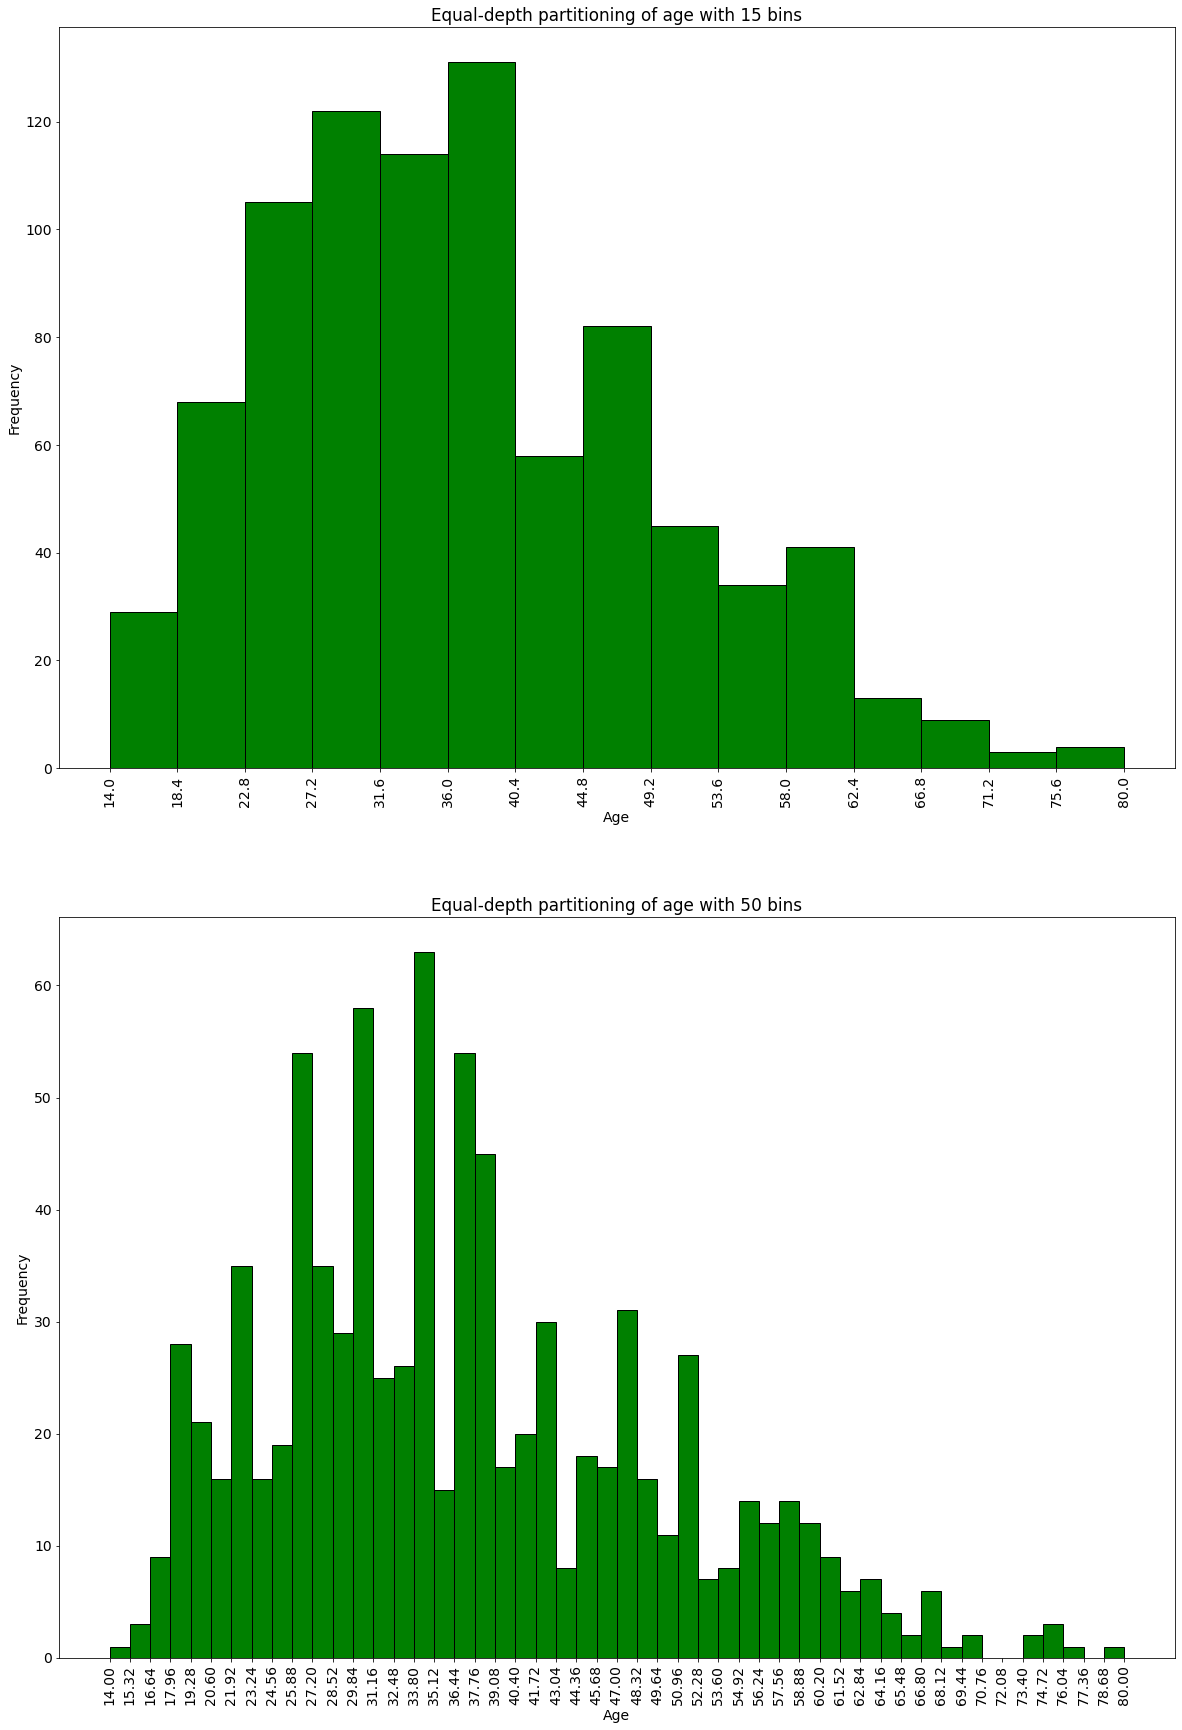

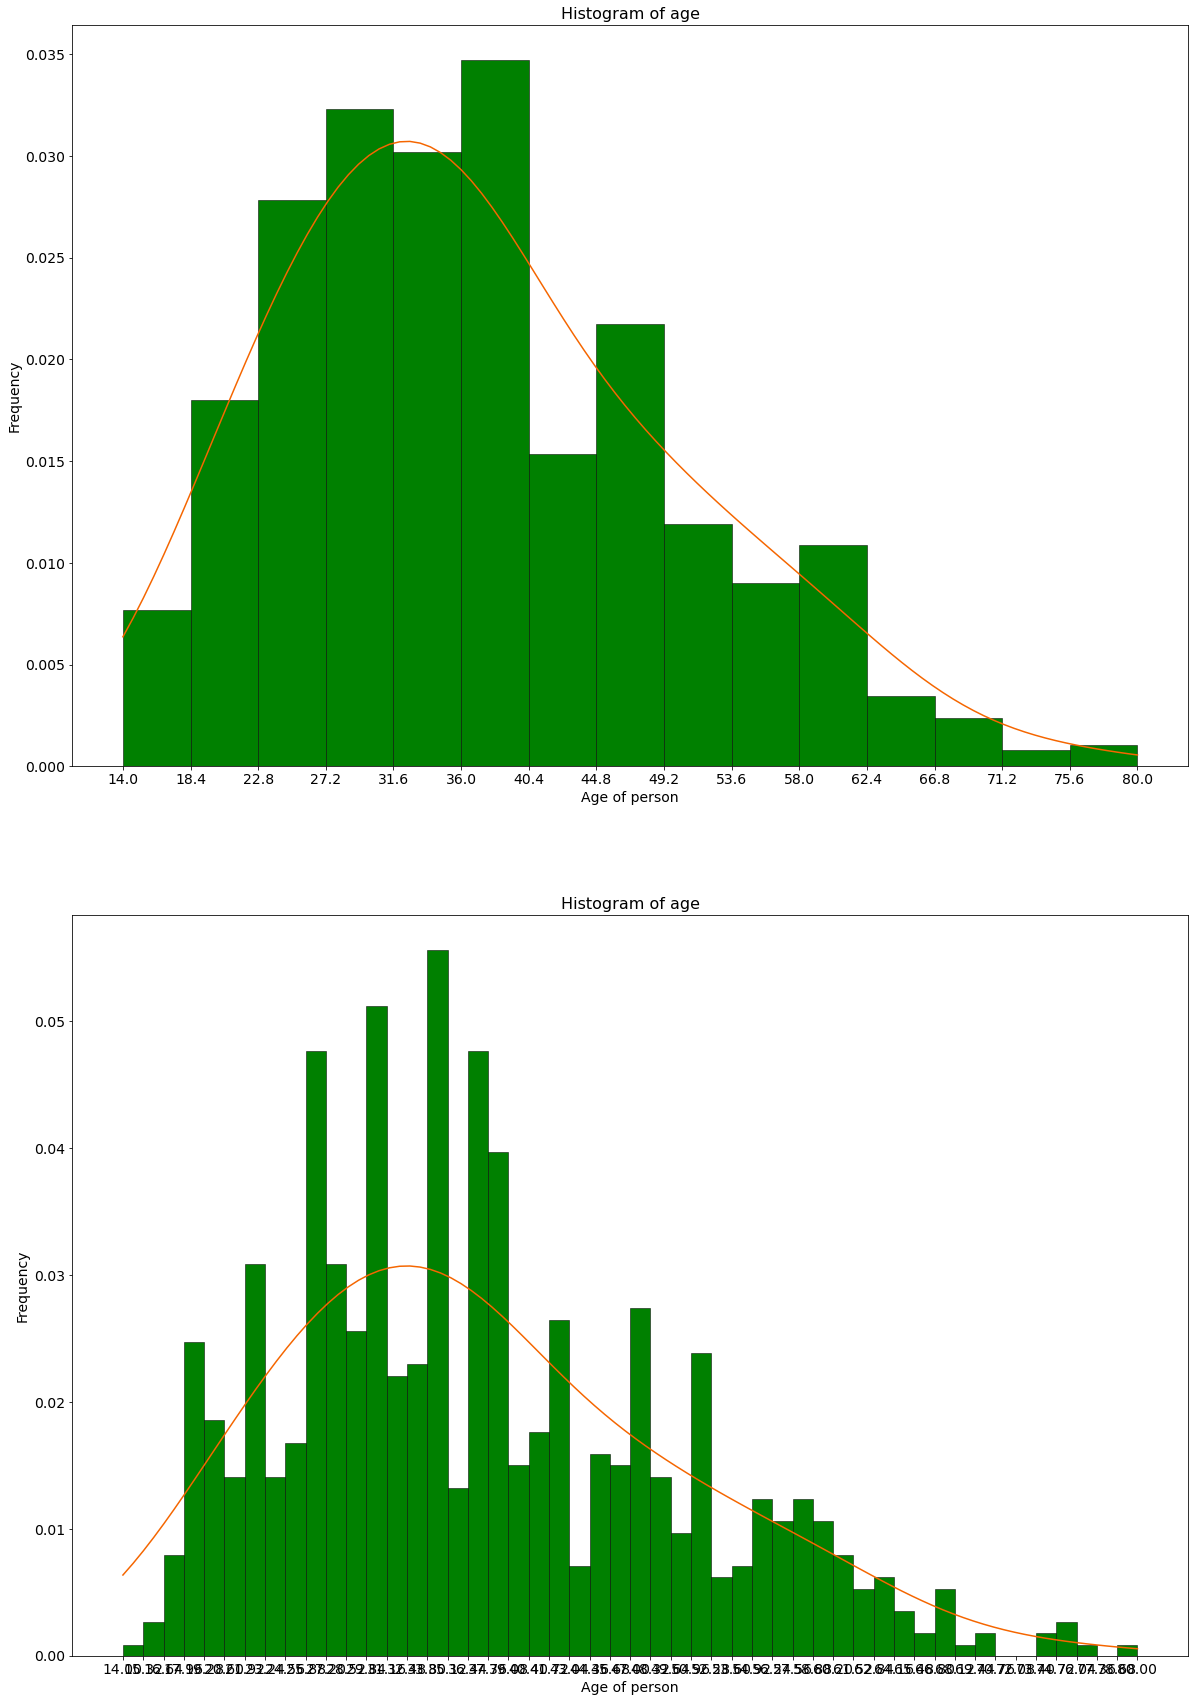

In [69]:
#### TODO: Write your code here
#### Equi-depth binning of age in a single plot
age_date=data['age'] # extracting age column
fig = plt.figure(figsize=(20,30)) # setting figure size
plt.subplot(2, 1, 1) # subplot number 1
n, bins, patches = plt.hist(data['age'], bins=15, facecolor='g', edgecolor='k')
plt.xlabel('Age') # X-label of plot
plt.ylabel('Frequency') # y-label of plot
plt.title('Equal-depth partitioning of age with 15 bins') # title of plot
plt.xticks(bins, Rotation='vertical')[-1] # label markings

plt.subplot(2, 1, 2) # subplot number 1
n, bins, patches = plt.hist(data['age'], bins=50, facecolor='g', edgecolor='k')
plt.xlabel('Age') # X-label of plot
plt.ylabel('Frequency') # y-label of plot
plt.title('Equal-depth partitioning of age with 50 bins') # title of plot
plt.xticks(bins, Rotation='vertical')[-1] # label markings
plt.show()

### Plotting gaussian kernel distribution
fig = plt.figure(figsize=(20,30))  # setting figure size
y = data["age"].values
# Fit the density
density = gaussian_kde(y) # gaussian kernel dbn of data
xs = np.linspace(np.min(y), np.max(y), 100) # spacing the values
density.covariance_factor = lambda : .45 # covariance factor
density._compute_covariance() # computing the covariance of density

# Plot the density chart of age
plt.subplot(2, 1, 1) # subplot number 1
_, bins, _ = plt.hist(y, bins=15, facecolor="g", edgecolor="k", 
                      linewidth=0.5, density=True, label="Histogram") #histogram plot
plt.plot(xs, density(xs), color="#f56600", label="Density") # density plot
plt.xlabel("Age of person") # X-label of plot
plt.ylabel("Frequency") # y-label of plot
plt.title("Histogram of age", fontsize=16) # title of plot
plt.xticks(bins)  # label markings


plt.subplot(2, 1, 2)
_, bins, _ = plt.hist(y, bins=50, facecolor="g", edgecolor="k", 
                      linewidth=0.5, density=True, label="Histogram") #histogram plot
plt.plot(xs, density(xs), color="#f56600", label="Density") # density plot
plt.xlabel("Age of person")# X-label of plot
plt.ylabel("Frequency") # y-label of plot
plt.title("Histogram of age", fontsize=16) # title of plot
plt.xticks(bins)  # label markings
plt.show()


> 3. Answer the following questions:
>> 1. Which age group is the most and least involved in the crimes in each of the binning?
>>> 1. For binning with 15 bins ```Age group (36-40.4)``` is involved most in shootings and ```Age group (71.2 -75.6)``` is least involved.
>>> 2. For binning with 50 bins ```Age group (33.8-35.2)``` is involved most in shootings and ```Age groups (70.76 -72.08), (72.08-73.40) and (77.36-78.68)``` are least involved
>> 2. Do you notice any outliers? Do they exist in both 15-bin and 50-bin analyses? Explain.
>>> The outliers depend on criteria we choose and if set ```zero deaths as an outlier``` with low value and ```above 125 deaths``` as an outlier with high value. We see outliers in both bin selections as we see that 15 bin selection has an ``` Age group (36-40.4) ``` and for 50 bins selection we have ```Age groups (70.76 -72.08), (72.08-73.40) and (77.36-78.68)``` as outlier
>> 3. What can you infer from the subplots by changing the bin size?
>>> By changing the bin size, we can have more in depth information about age groups involved in shootings. Because we increased bin size, we were able to see ```Age groups (70.76 -72.08), (72.08-73.40) and (77.36-78.68)``` as least involved with zero shootings
>> 4. Does the Gaussian KDE curve change upon changing the number of bins?
>>> Upon changing the bins, the Gaussian KDE curve became flatter with increase in number of bins. The peak of curve remains same at ```~0.03``` 

## 2. Univariate Data Visualization

### 2.1 Frequency plots

1. Plot the following as BAR plots in a single plot with two subplots. 
> 1. frequency of the data over each month
> 2. frequency of the data over each week

2. Identify the week number and month number with the highest and lowest criminal activity.
3. Is there any outlier? If yes, which month/week is it? Why do you consider it as an outlier?



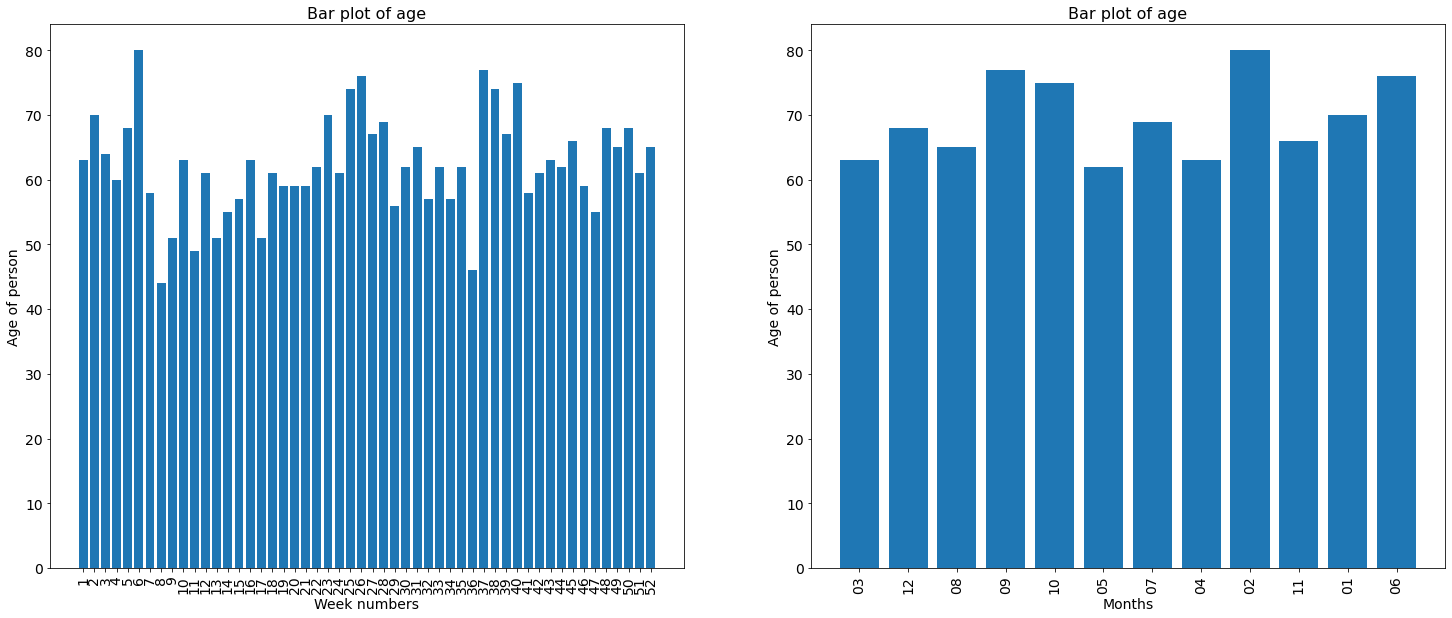

In [53]:
#### TODO: Write your code here
#### TODO: Write your code here
# Extract the category of cylinders
wk_num = np.sort(data_df["week_num"].unique()) # sorting the week numbers into colleection of unique items
mnth_num = np.sort(data_df["month_num"].unique()) # sorting the month numbers into colleection of unique items
fig = plt.figure(figsize=(25,10)) # setting figure size
plt.subplot(1, 2, 1) # subplot number 1
plt.bar(data_df["week_num"], data_df["age"]) # bar plot
plt.ylabel("Age of person") # y-label of person
plt.xlabel("Week numbers") # x-label of person
plt.xticks(wk_num,rotation=90) # label markings
plt.title("Bar plot of age", fontsize=16)  # title
 

plt.subplot(1, 2, 2)
plt.bar(data_df["month_num"], data_df["age"])# bar plot
plt.ylabel("Age of person")  # y-label of person
plt.xlabel("Months") # x-label of person
plt.xticks(mnth_num,rotation=90)  # label markings
plt.title("Bar plot of age", fontsize=16) # title
#plt.xticks(wk_num)

plt.show()


> 1. Identify the week number and month number with the highest and lowest criminal activity.
>>1. Highest criminal activity - <b>Week: 6</b> and <b> Month: 2</b>
>>2. Lowest criminal activity - <b>Week: 8</b> and <b> Month: 5</b>
> 2. Is there any outlier? If yes, which month/week is it? Why do you consider it as an outlier?
>>1. Outlier  depends on decision criteria i choose. If i set 75 deaths as outlier, i see several outliers in both weekly and monthly such as <b> Week 6, 37 </b> and <b> Month : 2 & 9</b>.The reason for selecting is 75 because it seems too much for weekly and monthly shooting rates

### 2.2 Box plot

Plot the ```age``` as a box plot. What can you infer from it?
From the boxplot shown below, we can see several outliers past ```Q3+1.5*IQR```

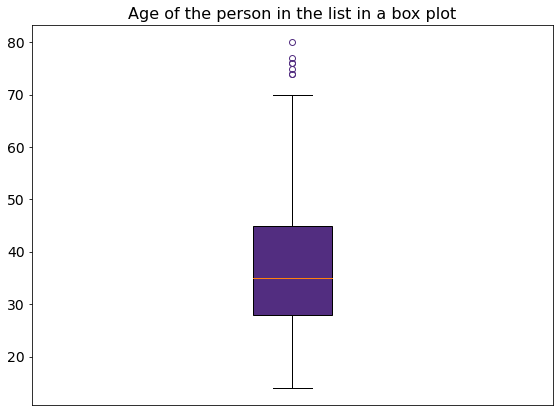

In [54]:
#### TODO: Write your code here
y=data_df['age'].values # extracting age data into a column
fig = plt.figure(figsize=(8, 6)) # # setting figure size
plt.boxplot(y, patch_artist=True, boxprops=dict(facecolor="#522d80"), 
            flierprops=dict(markeredgecolor="#522d80")) # box plot
plt.title("Age of the person in the list in a box plot", fontsize=16) # title
plt.xticks([]) # labels 
plt.tight_layout()
plt.show()

### 2.3 Box plot

Plot the ```age``` as a violin plot. What can you infer from it?
From violin cart below, most of deaths are concentrated around ``` Age groups of (30-40)```. The peak of density plot is slightly behind median of box plot

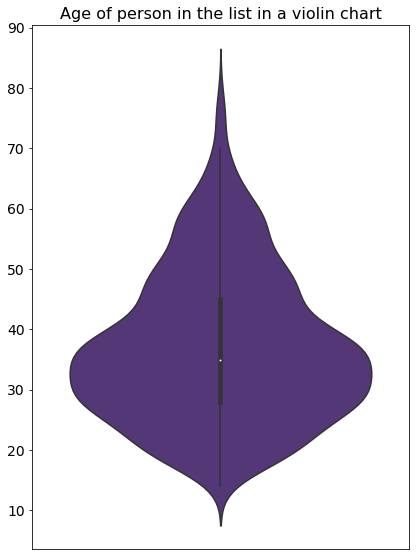

In [55]:
#### TODO: Write your code here
fig = plt.figure(figsize=(6, 8)) # setting figure size
sns.violinplot(y=y, color="#522d80") # violin plot
plt.title("Age of person in the list in a violin chart", fontsize=16)  # title
plt.xticks([])  # labels
plt.tight_layout()
plt.show()

## 3. Multi-variate Data visualization

The cancer dataset is sourced from this link: https://www.kaggle.com/subratac2020/cancer-data-set

Visit [Link1](https://www.kaggle.com/mirichoi0218/classification-breast-cancer-or-not-with-15-ml/data) and [Link2](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) for more information.

The Cancer dataset includes the `mean`, `standard error` and the `worst` information of the following:

> 1. radius (mean of distances from center to points on the perimeter)
> 2. texture (standard deviation of gray-scale values)
> 3. perimeter
> 4. area
> 5. smoothness (local variation in radius lengths)
> 6. compactness (perimeter^2 / area - 1.0)
> 7. concavity (severity of concave portions of the contour)
> 8. concave points (number of concave portions of the contour)
> 9. symmetry
> 10. fractal dimension ("coastline approximation" - 1)

We will only be focussing on the `mean` values of the features. 

Load the dataset

In [56]:
#### TODO: Write your code here
dat_can = pd.read_csv("CancerData.csv") # laoding cancer data
dat_can.head() # viewing data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,2,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,3,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,4,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,5,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [57]:
dat_mean=dat_can.loc[:, 'radius_mean':'fractal_dimension_mean'] # selcting essential infiormation
dat_mean.head() # dispalyting selcted info

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


### 3.1 Heatmap

1. Plot the heatmap of the mean values of the cancer dataset. Use Pearson correlation coefficient.
2. Identify the top two pair of variables with the highest correlation. Similarly, identify the top two pairs with the lowest correlation.

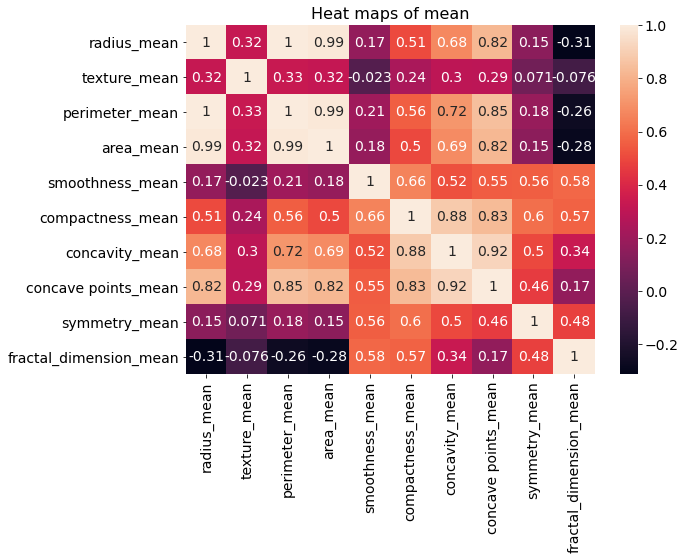

In [58]:
#### TODO: Write your code here
corr = dat_mean.corr(method='pearson') # finding correlation of data

# Visulize the correlation coeeficient in a heatmap
plt.figure(figsize=(10, 8)) # setting fig size
sns.heatmap(corr, annot=True) # using seaborn to plot heat map
plt.title("Heat maps of mean", fontsize=16) # title
plt.tight_layout()
plt.show()

> 1. Identify the top two pair of variables with the highest correlation. Similarly, identify the top two pairs with the lowest correlation.
>> 1. Highest correlation-
>>> 1. <b> Radius mean and Area Mean</b>, <b>perimeter mean and Area Mean</b>  with a correlation of ```0.99```
>>> 2. <b> Radius mean and Perimeter Mean</b> with a correlation of ```1```
>> 2. Lowest correlation-
>>> 1. <b> Smoothness mean and texture Mean</b> with a correlation of ```-0.023```
>>> 2. <b> texture mean and symmetry Mean</b> with a correlation of ```0.071```

### 3.2  2D Scatter Plots

Let's pick four variables: `radius_mean`, `area_mean`, `texture_mean` and `smoothness_mean`.

Plot scatter plots of the following pairs:
1.  `radius_mean` and `area_mean`
2. `texture_mean` and `smoothness_mean`

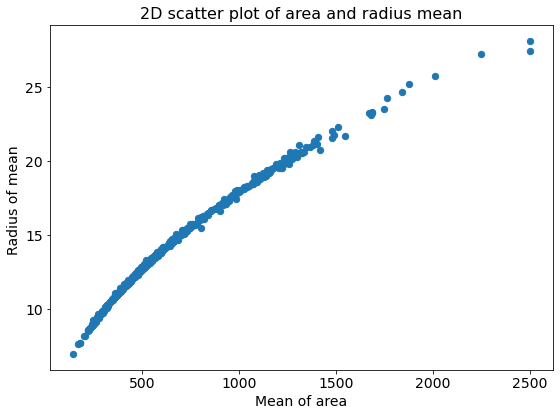

In [59]:
#### TODO: Write your code here
fig = plt.figure(figsize=(8, 6)) # setting fig size
plt.scatter(dat_mean["area_mean"],dat_mean["radius_mean"],  s=40) #scatter plot
plt.xlabel("Mean of area") # x-label
plt.ylabel("Radius of mean ")# y-label
plt.title("2D scatter plot of area and radius mean", fontsize=16) # title 
plt.tight_layout()
plt.show()

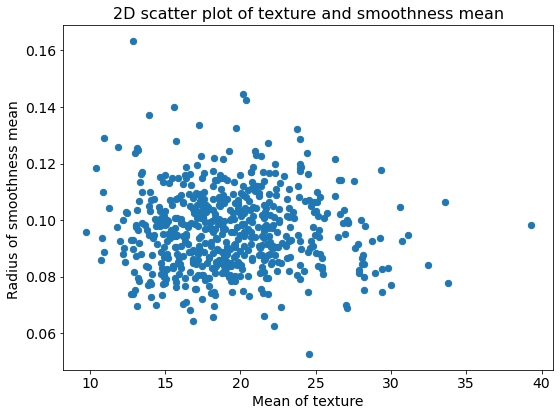

In [60]:
#### TODO: Write your code here
fig = plt.figure(figsize=(8, 6)) # setting fig size
plt.scatter(dat_mean["texture_mean"],dat_mean["smoothness_mean"],  s=40) #scatter plot
plt.xlabel("Mean of texture") # x-label
plt.ylabel("Radius of smoothness mean ") # y-label
plt.title("2D scatter plot of texture and smoothness mean", fontsize=16) # title
plt.tight_layout()
plt.show()

What can you infer from the 2D scatter plots?

> 1. The first scatter plot is almost linear and also from heat map we can see it has correlation factor 0f <b>0.99</b>
> 2. The Second scatter plot does not seem to have any sort of relationship and also from heat map we can see it has correlation factor of <b>-0.023</b>

### 3.3 Pair-wise scatter plots

Plot the pair-wise scatter plots of the mean value sof the cancer dataset using the `pairplot` object in the Seaborn library.

<Figure size 1440x2160 with 0 Axes>

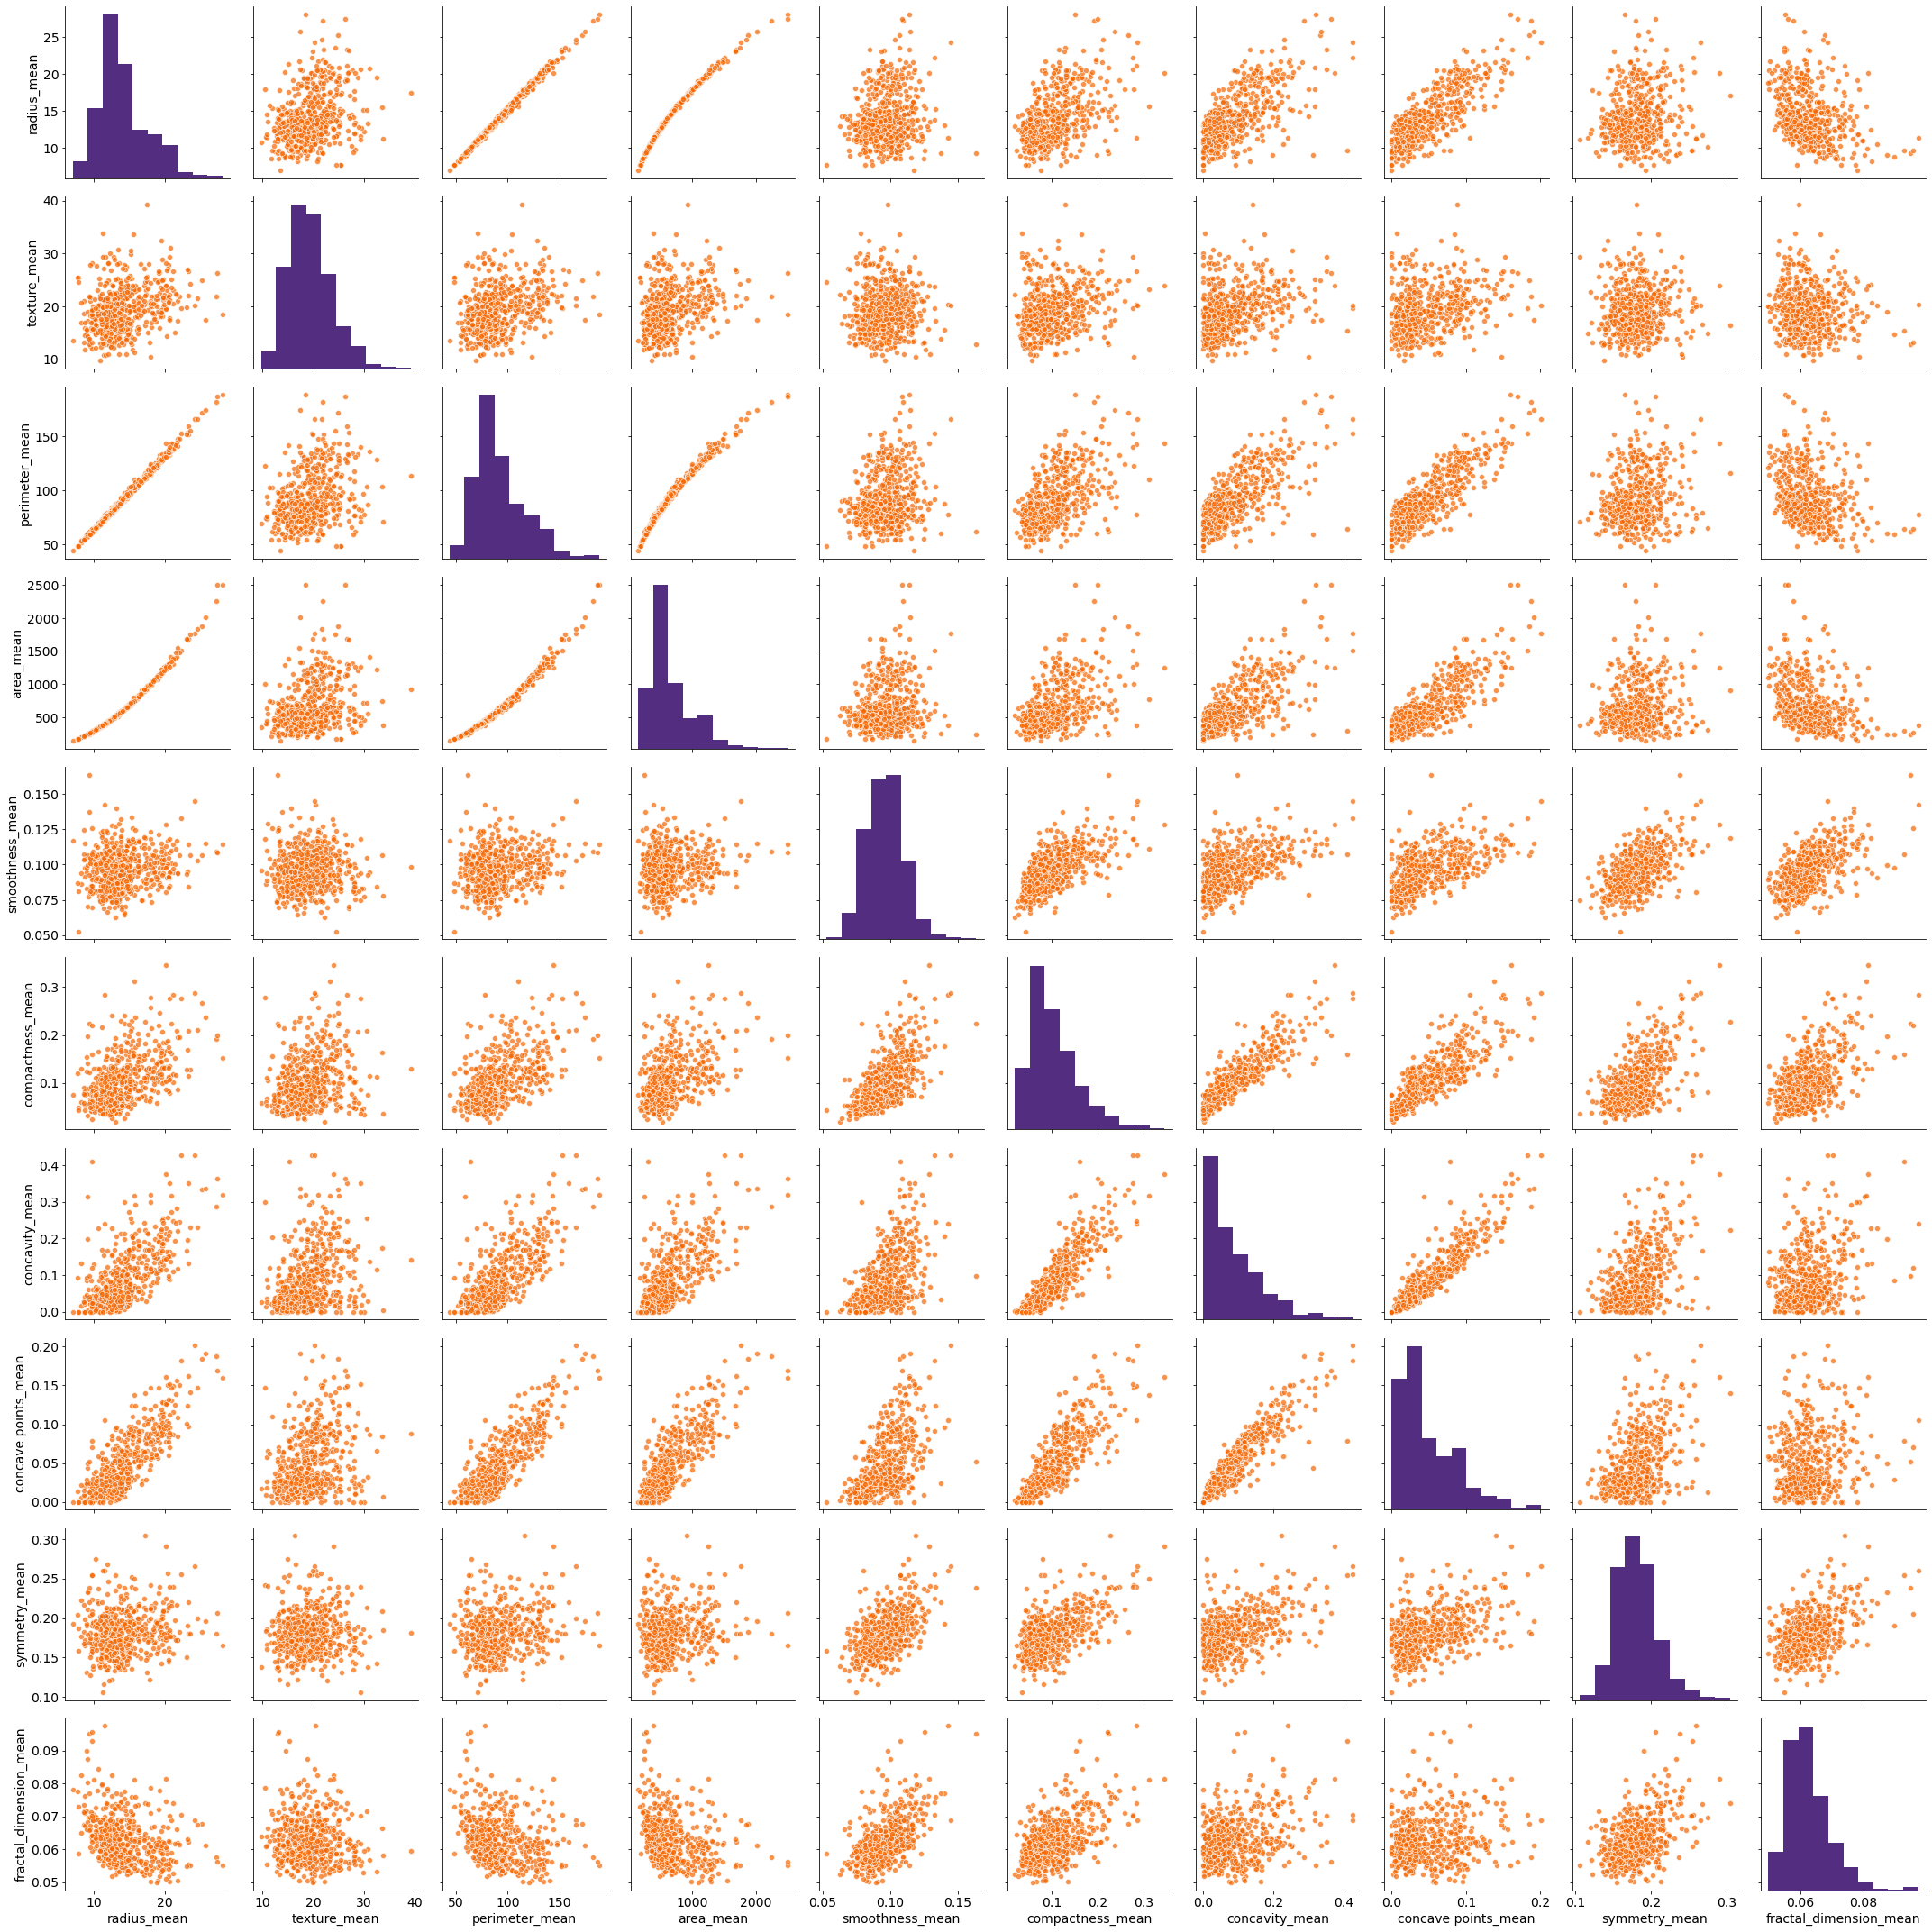

In [61]:
#### TODO: Write your code here
fig = plt.figure(figsize=(20,30)) # setting fig size
sns.pairplot(data=dat_mean, height=3, 
             plot_kws={"color": "#f56600", "alpha": 0.7}, 
             diag_kws={"color": "#522d80"}) # pair plot
plt.tight_layout()
plt.show()

1. Is there any correlation between the heatmap (in sec. 3.1) and the multi-variate pair plot?

2. If you need to select minimum number of variables to predict the tumor behavior (malignant/benign) while having maximum predictability, which variables will you select and which ones you will discard? Why?

>1. We can see some of scatter plots almost having linear relationship and from heatmap we can confirm the same 
>> 1. <b> Radius mean and Area Mean</b>, <b>perimeter mean and Area Mean</b>  with a correlation of ```0.99```
>> 2. <b> Radius mean and Perimeter Mean</b> with a correlation of ```1```
>2. Selection of minimum variables
>> 1. The criteria for selction can be correlation factor greater than +/- 0.7
>> 2.<b> Radius mean, Area Mean, Perimeter mean, concavity mean, concave points_mean, compactness mean</b>

>2. Disregarding the  variables
>> 1. The criteria for selction can be correlation factor between +/- 0.3
>> 2. <b> texture mean, Smoothness Mean and Fractal_dimension_mean</b> 